In [ ]:
#Code to Convert raw data into numerical ones
import numpy as np

# Load the data
file_path = "/content/airwaysdata.csv"
path2 = "/content/AM_SSBDATA.csv"
f = np.fromfile(open(file_path), dtype=np.float32)
g = np.fromfile(open(path2), dtype=np.float32)
# Save the converted values back to a CSV file
output_file_path = "/content/Converted_AM.csv"
np.savetxt(output_file_path, f, delimiter=",", fmt="%.6f")

Output_file_path = "/content/Converted_SSB.csv"
np.savetxt(Output_file_path, g, delimiter=",", fmt="%.6f")

# The converted file can now be downloaded from the specified path
print(f"Converted values have been saved to: {output_file_path}")
print(f"Converted values have been saved to: {Output_file_path}")

Converted values have been saved to: /content/Converted_AM.csv
Converted values have been saved to: /content/Converted_SSB.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Converted_SSB.csv")
df.head()

,Frequency,Type of Modulation
0,-0.000004,NaN
1,0.000025,NaN
2,0.000001,NaN
3,-0.000008,NaN
4,0.000053,NaN


In [ ]:
# Replace all values in an existing column with "AM- Single Side band"
# Replace all values in an existing column with "Amplitude Modulation"
import pandas as pd
df = pd.read_csv("/content/Converted_AM.csv")
df['Type of Modulation'] = "Amplitude Modulation"
df.to_csv("/content/SDC_AM.csv", index=False)



In [ ]:
#Reducing the rows randomly for AM
import pandas as pd
data = pd.read_csv("/content/SDC_AM.csv")
if len(data) >= 50000:
    reduced_data = data.sample(n=50000, random_state=42).reset_index(drop=True)
    reduced_data.to_csv("/content/SDC_Final__AM_50k.csv", index=False)
    print("Dataset reduced to 50,000 rows and saved as SDC_Final_50K.csv.")
else:
    print("The dataset has fewer than 50,000 rows. Cannot reduce further.")



Dataset reduced to 50,000 rows and saved as SDC_Final_50K.csv.


In [ ]:
len(reduced_data)

50000

In [ ]:
#Reducing the rows randomly for Phase
import pandas as pd
data = pd.read_csv("/content/SDC_Phase.csv")
if len(data) >= 50000:
    reduced_data = data.sample(n=50000, random_state=42).reset_index(drop=True)
    reduced_data.to_csv("/content/SDC_Final__Phase_50K.csv", index=False)
    print("Dataset reduced to 50,000 rows and saved as SDC_Final_50K.csv.")
else:
    print("The dataset has fewer than 50,000 rows. Cannot reduce further.")


Dataset reduced to 50,000 rows and saved as SDC_Final_50K.csv.


<ipython-input-88-e94476485c1f>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/SDC_Phase.csv")


In [ ]:
#Combining both reduced Datasets
import pandas as pd
df1 = pd.read_csv("/content/SDC_Final__AM_50k.csv")
df2 = pd.read_csv("/content/SDC_Final__Phase_50K.csv")
combimed_df = pd.concat([df1, df2], axis=1)
combimed_df.to_csv("/content/SDC_Final5.csv", index=False)




In [ ]:
combimed_df.head()

In [ ]:
#Converting both datasets into one
import pandas as pd

# File path for the input CSV file
file_path = '/content/SDC_Final5.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Concatenate 'Frequency' columns
appended_frequency = pd.concat([data['Frequency'], data['Frequency.1']], ignore_index=True)

# Concatenate 'Type of Modulation' columns
appended_modulation = pd.concat([data['Type of Modulation'], data['Type of Modulation.1']], ignore_index=True)

# Create a new DataFrame with combined data
appended_data = pd.DataFrame({
    'Frequency': appended_frequency,
    'Type of Modulation': appended_modulation
})

# Drop rows with missing values and reset index
cleaned_data = appended_data.dropna().reset_index(drop=True)
cleaned_data = cleaned_data.sample(frac=1).reset_index(drop=True)
output_path = '/content/Cleaned_SDC_Final.csv'
cleaned_data.to_csv(output_path, index=False)

print(f"Cleaned and shuffled data saved to {output_path}")



Cleaned and shuffled data saved to /content/Cleaned_SDC_Final.csv


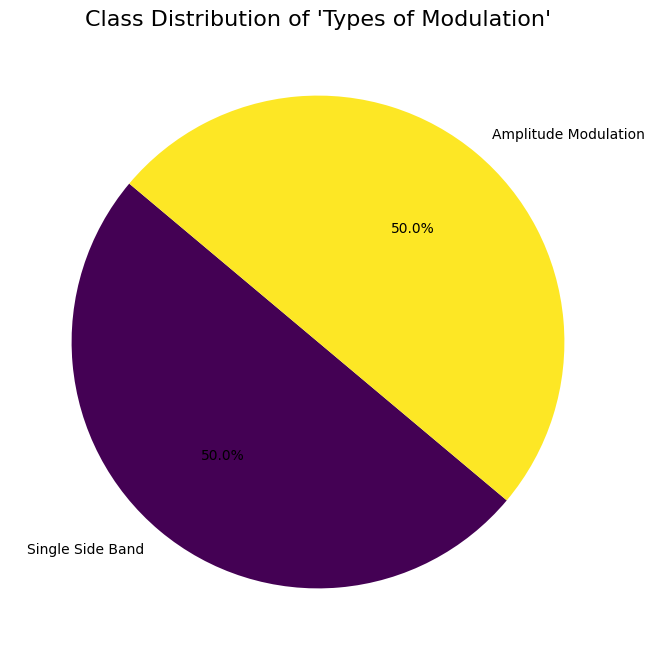

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('/content/Cleaned_SDC_Final.csv')

# Pie chart for the 'Type of Modulation' column
modulation_counts = df['Type of Modulation'].value_counts()

plt.figure(figsize=(8, 8))
modulation_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis', legend=False)
plt.title("Class Distribution of 'Types of Modulation'", fontsize=16)
plt.ylabel('')  # Hide the default y-axis label
plt.show()


Fold 1
Fold 1 Train Accuracy: 0.9964
Fold 1 Test Accuracy: 0.9940
Fold 2
Fold 2 Train Accuracy: 0.9965
Fold 2 Test Accuracy: 0.9948
Fold 3
Fold 3 Train Accuracy: 0.9965
Fold 3 Test Accuracy: 0.9944
Fold 4
Fold 4 Train Accuracy: 0.9966
Fold 4 Test Accuracy: 0.9940
Fold 5
Fold 5 Train Accuracy: 0.9965
Fold 5 Test Accuracy: 0.9941

Average Train Accuracy across 5 folds: 0.9965
Average Test Accuracy across 5 folds: 0.9942

Classification Reports for Each Fold:

Fold 1:
                      precision    recall  f1-score   support

Amplitude Modulation       0.99      1.00      0.99     10000
    Single Side Band       1.00      0.99      0.99     10000

            accuracy                           0.99     20000
           macro avg       0.99      0.99      0.99     20000
        weighted avg       0.99      0.99      0.99     20000


Fold 2:
                      precision    recall  f1-score   support

Amplitude Modulation       0.99      1.00      0.99     10000
    Single Side Band 

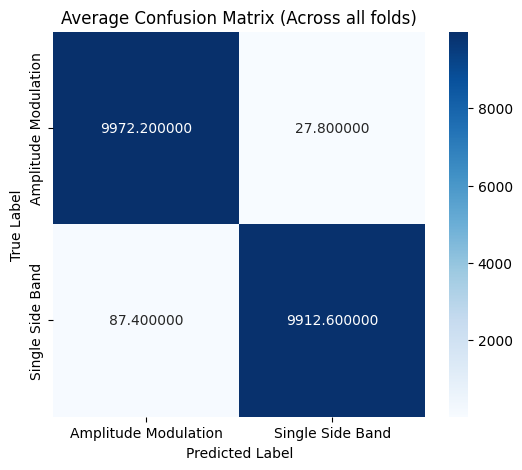

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/Cleaned_SDC_Final.csv")

# Features and labels
X = data[["Frequency"]].values
y = data["Type of Modulation"]

# Encode labels
lb = LabelEncoder()
y_encoded = lb.fit_transform(y)

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies_train = []
accuracies_test = []
classification_reports = {}
confusion_matrices = np.zeros((len(lb.classes_), len(lb.classes_)))  # Initialize confusion matrix
fold = 1

# K-Fold cross-validation loop
for train_index, test_index in kf.split(X, y_encoded):
    print(f"Fold {fold}")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )

    # Train Random Forest model
    rf_model.fit(X_train, y_train)

    # Predictions
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    accuracies_train.append(train_accuracy)
    accuracies_test.append(test_accuracy)

    print(f"Fold {fold} Train Accuracy: {train_accuracy:.4f}")
    print(f"Fold {fold} Test Accuracy: {test_accuracy:.4f}")

    # Classification report for this fold
    report = classification_report(y_test, y_test_pred, target_names=lb.classes_)
    classification_reports[f"Fold {fold}"] = report

    # Confusion matrix for the fold
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices += cm  # Accumulate confusion matrix

    fold += 1

# Calculate average accuracies
average_train_accuracy = np.mean(accuracies_train)
average_test_accuracy = np.mean(accuracies_test)

# Calculate average confusion matrix
average_confusion_matrix = confusion_matrices / kf.n_splits

# Print average accuracies
print(f"\nAverage Train Accuracy across {kf.n_splits} folds: {average_train_accuracy:.4f}")
print(f"Average Test Accuracy across {kf.n_splits} folds: {average_test_accuracy:.4f}")

# Print classification reports for each fold
print("\nClassification Reports for Each Fold:")
for fold_name, report in classification_reports.items():
    print(f"\n{fold_name}:\n{report}")

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(average_confusion_matrix, annot=True, fmt="f", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Average Confusion Matrix (Across all folds)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fold 1
Fold 1 Train Accuracy: 0.7537
Fold 1 Test Accuracy: 0.7544
Fold 2
Fold 2 Train Accuracy: 0.7539
Fold 2 Test Accuracy: 0.7548
Fold 3
Fold 3 Train Accuracy: 0.7538
Fold 3 Test Accuracy: 0.7560
Fold 4
Fold 4 Train Accuracy: 0.7547
Fold 4 Test Accuracy: 0.7497
Fold 5
Fold 5 Train Accuracy: 0.7538
Fold 5 Test Accuracy: 0.7549

Average Train Accuracy across 5 folds: 0.7540
Average Test Accuracy across 5 folds: 0.7540

Classification Reports for Each Fold:

Fold 1:
                      precision    recall  f1-score   support

Amplitude Modulation       0.67      1.00      0.80     10000
    Single Side Band       1.00      0.51      0.67     10000

            accuracy                           0.75     20000
           macro avg       0.84      0.75      0.74     20000
        weighted avg       0.84      0.75      0.74     20000


Fold 2:
                      precision    recall  f1-score   support

Amplitude Modulation       0.67      1.00      0.80     10000
    Single Side Band 

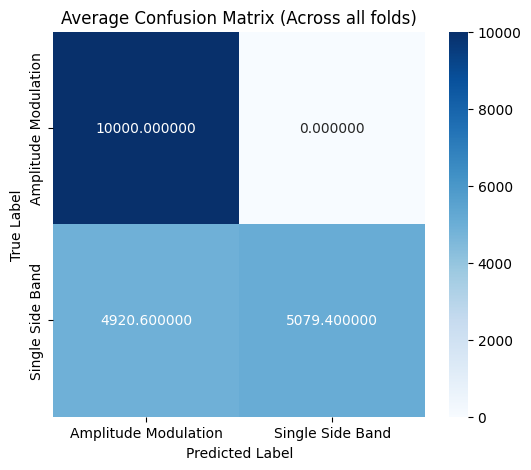

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/Cleaned_SDC_Final.csv")

# Features and labels
X = data[["Frequency"]].values
y = data["Type of Modulation"]

# Encode labels
lb = LabelEncoder()
y_encoded = lb.fit_transform(y)

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies_train = []
accuracies_test = []
classification_reports = {}
confusion_matrices = np.zeros((len(lb.classes_), len(lb.classes_)))  # Initialize confusion matrix
fold = 1

# K-Fold cross-validation loop
for train_index, test_index in kf.split(X, y_encoded):
    print(f"Fold {fold}")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Initialize Logistic Regression model
    lr_model = LogisticRegression(
        solver='lbfgs',   # Common solver for smaller datasets
        max_iter=1000,    # Increased iterations to ensure convergence
        random_state=42
    )

    # Train Logistic Regression model
    lr_model.fit(X_train, y_train)

    # Predictions
    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    accuracies_train.append(train_accuracy)
    accuracies_test.append(test_accuracy)

    print(f"Fold {fold} Train Accuracy: {train_accuracy:.4f}")
    print(f"Fold {fold} Test Accuracy: {test_accuracy:.4f}")

    # Classification report for this fold
    report = classification_report(y_test, y_test_pred, target_names=lb.classes_)
    classification_reports[f"Fold {fold}"] = report

    # Confusion matrix for the fold
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices += cm  # Accumulate confusion matrix

    fold += 1

# Calculate average accuracies
average_train_accuracy = np.mean(accuracies_train)
average_test_accuracy = np.mean(accuracies_test)

# Calculate average confusion matrix
average_confusion_matrix = confusion_matrices / kf.n_splits

# Print average accuracies
print(f"\nAverage Train Accuracy across {kf.n_splits} folds: {average_train_accuracy:.4f}")
print(f"Average Test Accuracy across {kf.n_splits} folds: {average_test_accuracy:.4f}")

# Print classification reports for each fold
print("\nClassification Reports for Each Fold:")
for fold_name, report in classification_reports.items():
    print(f"\n{fold_name}:\n{report}")

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(average_confusion_matrix, annot=True, fmt="f", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Average Confusion Matrix (Across all folds)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Fold 1
[LightGBM] [Info] Number of positive: 40000, number of negative: 40000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.0234518
Fold 1 Train Accuracy: 0.9952
Fold 1 Test Accuracy: 0.9946

Fold 2
[LightGBM] [Info] Number of positive: 40000, number of negative: 40000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 80000, number of used featu

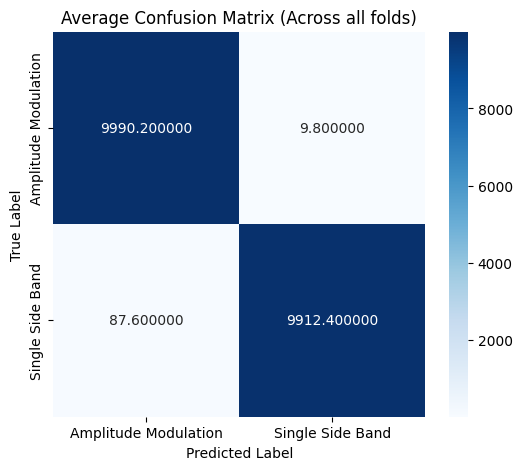

In [9]:
# LightGBM Model with Train/Test Accuracy, Classification Report, and Average Confusion Matrix (Plot)
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/Cleaned_SDC_Final.csv")
X = data[["Frequency"]].values
y = data["Type of Modulation"]

# Encode labels
lb = LabelEncoder()
y_encoded = lb.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(lb.transform(lb.classes_), class_weights))

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies_train = []
accuracies_test = []
classification_reports = {}
confusion_matrices = np.zeros((2, 2))  # Initialize the confusion matrix (binary classification)
fold = 1

# Cross-validation loop
for train_index, test_index in kf.split(X, y_encoded):
    print(f"\nFold {fold}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Assign class weights to the training data
    train_weights = pd.Series(y_train).map(class_weights_dict)

    # Create LightGBM datasets
    lgb_train = lgb.Dataset(X_train, label=y_train, weight=train_weights)
    lgb_test = lgb.Dataset(X_test, label=y_test)

    # LightGBM parameters for binary classification
    params = {
        'objective': 'binary',  # Changed to binary classification
        'metric': 'binary_logloss',  # Changed to binary log loss
        'num_leaves': 31,
        'learning_rate': 0.1,
        'max_depth': -1,
        'seed': 42
    }

    # Train LightGBM model
    lgb_model = lgb.train(
        params,
        lgb_train,
        num_boost_round=100,
        valid_sets=lgb_test,
        callbacks=[lgb.early_stopping(stopping_rounds=10)],
    )

    # Train accuracy
    y_train_pred_probs = lgb_model.predict(X_train)
    y_train_pred = (y_train_pred_probs >= 0.5).astype(int)  # Convert probabilities to binary predictions
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracies_train.append(train_accuracy)

    # Test accuracy
    y_test_pred_probs = lgb_model.predict(X_test)
    y_test_pred = (y_test_pred_probs >= 0.5).astype(int)  # Convert probabilities to binary predictions
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracies_test.append(test_accuracy)

    # Print fold accuracies
    print(f"Fold {fold} Train Accuracy: {train_accuracy:.4f}")
    print(f"Fold {fold} Test Accuracy: {test_accuracy:.4f}")

    # Classification report for the fold
    report = classification_report(y_test, y_test_pred, target_names=lb.classes_, output_dict=True)
    classification_reports[f"Fold {fold}"] = report

    # Confusion matrix for the fold
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices += cm  # Accumulate confusion matrix

    fold += 1

# Calculate average accuracies
average_train_accuracy = np.mean(accuracies_train)
average_test_accuracy = np.mean(accuracies_test)

# Calculate average confusion matrix
average_confusion_matrix = confusion_matrices / kf.n_splits

# Print average accuracies
print("\nAverage Train Accuracy across folds: {:.4f}".format(average_train_accuracy))
print("Average Test Accuracy across folds: {:.4f}".format(average_test_accuracy))

# Print classification reports
print("\nClassification Reports for Each Fold:")
for fold_name, report in classification_reports.items():
    print(f"\n{fold_name} Classification Report:")
    print(pd.DataFrame(report).transpose())

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(average_confusion_matrix, annot=True, fmt="f", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Average Confusion Matrix (Across all folds)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Fold 1
Fold 1 Train Accuracy: 0.9935
Fold 1 Test Accuracy: 0.9929

Fold 2
Fold 2 Train Accuracy: 0.9938
Fold 2 Test Accuracy: 0.9944

Fold 3
Fold 3 Train Accuracy: 0.9931
Fold 3 Test Accuracy: 0.9932

Fold 4
Fold 4 Train Accuracy: 0.9952
Fold 4 Test Accuracy: 0.9950

Fold 5
Fold 5 Train Accuracy: 0.9938
Fold 5 Test Accuracy: 0.9939

Average Accuracies across folds:
Average Train Accuracy: 0.9939
Average Test Accuracy: 0.9939

Classification Reports for Each Fold:

Fold 1 Classification Report:
                      precision   recall  f1-score      support
Amplitude Modulation   0.989280  0.99670  0.992976  10000.00000
Single Side Band       0.996675  0.98920  0.992923  10000.00000
accuracy               0.992950  0.99295  0.992950      0.99295
macro avg              0.992978  0.99295  0.992950  20000.00000
weighted avg           0.992978  0.99295  0.992950  20000.00000

Fold 2 Classification Report:
                      precision   recall  f1-score      support
Amplitude Modulation 

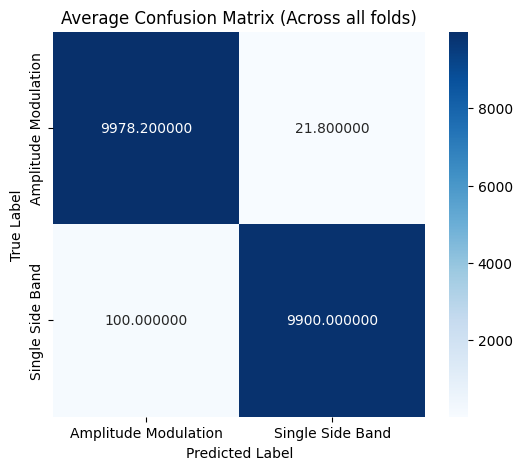

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

# Load dataset
data = pd.read_csv("/content/Cleaned_SDC_Final.csv")

# Features and labels
X = data[["Frequency"]].values
y = data["Type of Modulation"]

# Encode labels
lb = LabelEncoder()
y_encoded = lb.fit_transform(y)

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies_train = []
accuracies_test = []
classification_reports = {}
confusion_matrices = np.zeros((len(lb.classes_), len(lb.classes_)))  # Initialize confusion matrix
fold = 1

# K-Fold cross-validation loop
for train_index, test_index in kf.split(X, y_encoded):
    print(f"\nFold {fold}")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Initialize CatBoost model
    cat_model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        loss_function='MultiClass',
        verbose=0,  # Set to 0 to disable output
        random_seed=42
    )

    # Train CatBoost model
    cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=[], plot=False)

    # Predictions
    y_train_pred = cat_model.predict(X_train)
    y_test_pred = cat_model.predict(X_test)

    # Convert predictions to integer
    y_train_pred_cat = y_train_pred.astype(int)
    y_test_pred_cat = y_test_pred.astype(int)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred_cat)
    test_accuracy = accuracy_score(y_test, y_test_pred_cat)

    accuracies_train.append(train_accuracy)
    accuracies_test.append(test_accuracy)

    print(f"Fold {fold} Train Accuracy: {train_accuracy:.4f}")
    print(f"Fold {fold} Test Accuracy: {test_accuracy:.4f}")

    # Classification report for this fold
    report = classification_report(y_test, y_test_pred_cat, target_names=lb.classes_, output_dict=True)
    classification_reports[f"Fold {fold}"] = report

    # Confusion matrix for the fold
    cm = confusion_matrix(y_test, y_test_pred_cat)
    confusion_matrices += cm  # Accumulate confusion matrix

    fold += 1

# Calculate average accuracies
average_train_accuracy = np.mean(accuracies_train)
average_test_accuracy = np.mean(accuracies_test)

# Calculate average confusion matrix
average_confusion_matrix = confusion_matrices / kf.n_splits

# Print average accuracies
print("\nAverage Accuracies across folds:")
print(f"Average Train Accuracy: {average_train_accuracy:.4f}")
print(f"Average Test Accuracy: {average_test_accuracy:.4f}")

# Print classification reports for each fold
print("\nClassification Reports for Each Fold:")
for fold_name, report in classification_reports.items():
    print(f"\n{fold_name} Classification Report:")
    print(pd.DataFrame(report).transpose())

# Plot the average confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(average_confusion_matrix, annot=True, fmt="f", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Average Confusion Matrix (Across all folds)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00
